In [1]:
# Task 2: Linear Regression Project – Predicting House Prices

# Objective:
# Apply regression to predict numerical outcomes and handle preprocessing steps.

# Tools: Python, Pandas, Scikit-learn, Matplotlib, Seaborn

# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# [Subtask 1] Load housing dataset (California Housing as replacement for deprecated Boston dataset)
cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target, name='PRICE')

# Visualize first few rows of data
print("\nSample Features:")
print(X.head())
print("\nTarget Variable:")
print(y.head())


Sample Features:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target Variable:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64


In [3]:
# Dataset info
print("\nDataset Info of Features:")
print(X.info())
print("\nDataset Info of Target Variable (Price):")
print(y.info())


Dataset Info of Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Dataset Info of Target Variable (Price):
<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: PRICE
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


In [4]:
# Data Preprocessing --- Check and handle missing values
print("\nMissing values in each column:")
print(X.isnull().sum())


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


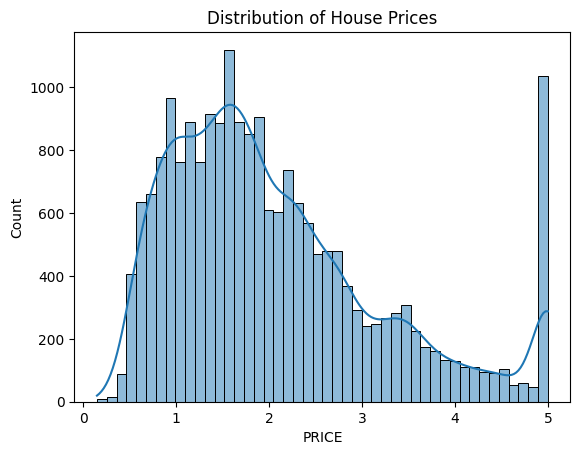

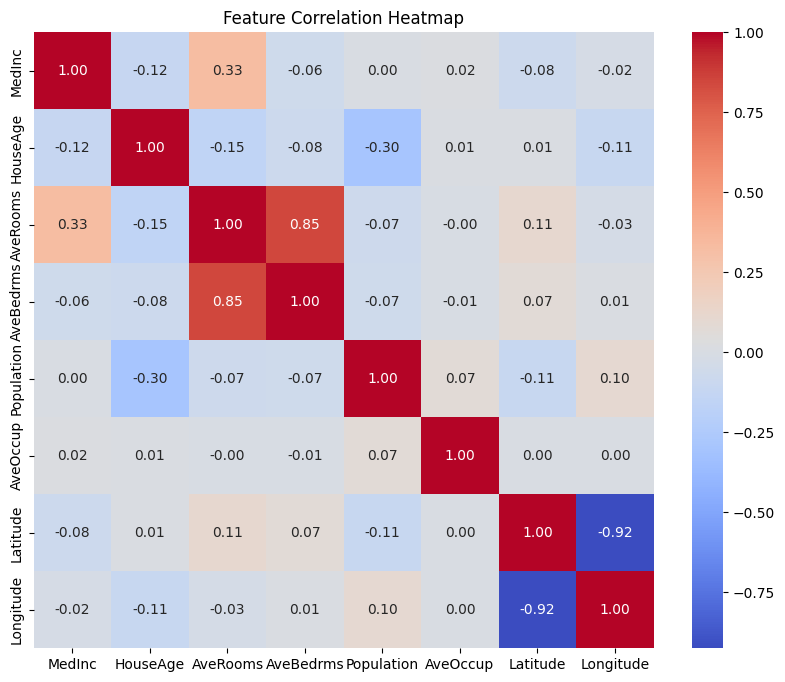

In [5]:
# --- Step 3: Feature Analysis ---
# [Subtask 2] Perform feature selection and preprocessing (EDA part)
sns.histplot(y, kde=True)
plt.title("Distribution of House Prices")
plt.show()
print("\n")

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Training feature shape: (16512, 8)
Test feature shape: (4128, 8)




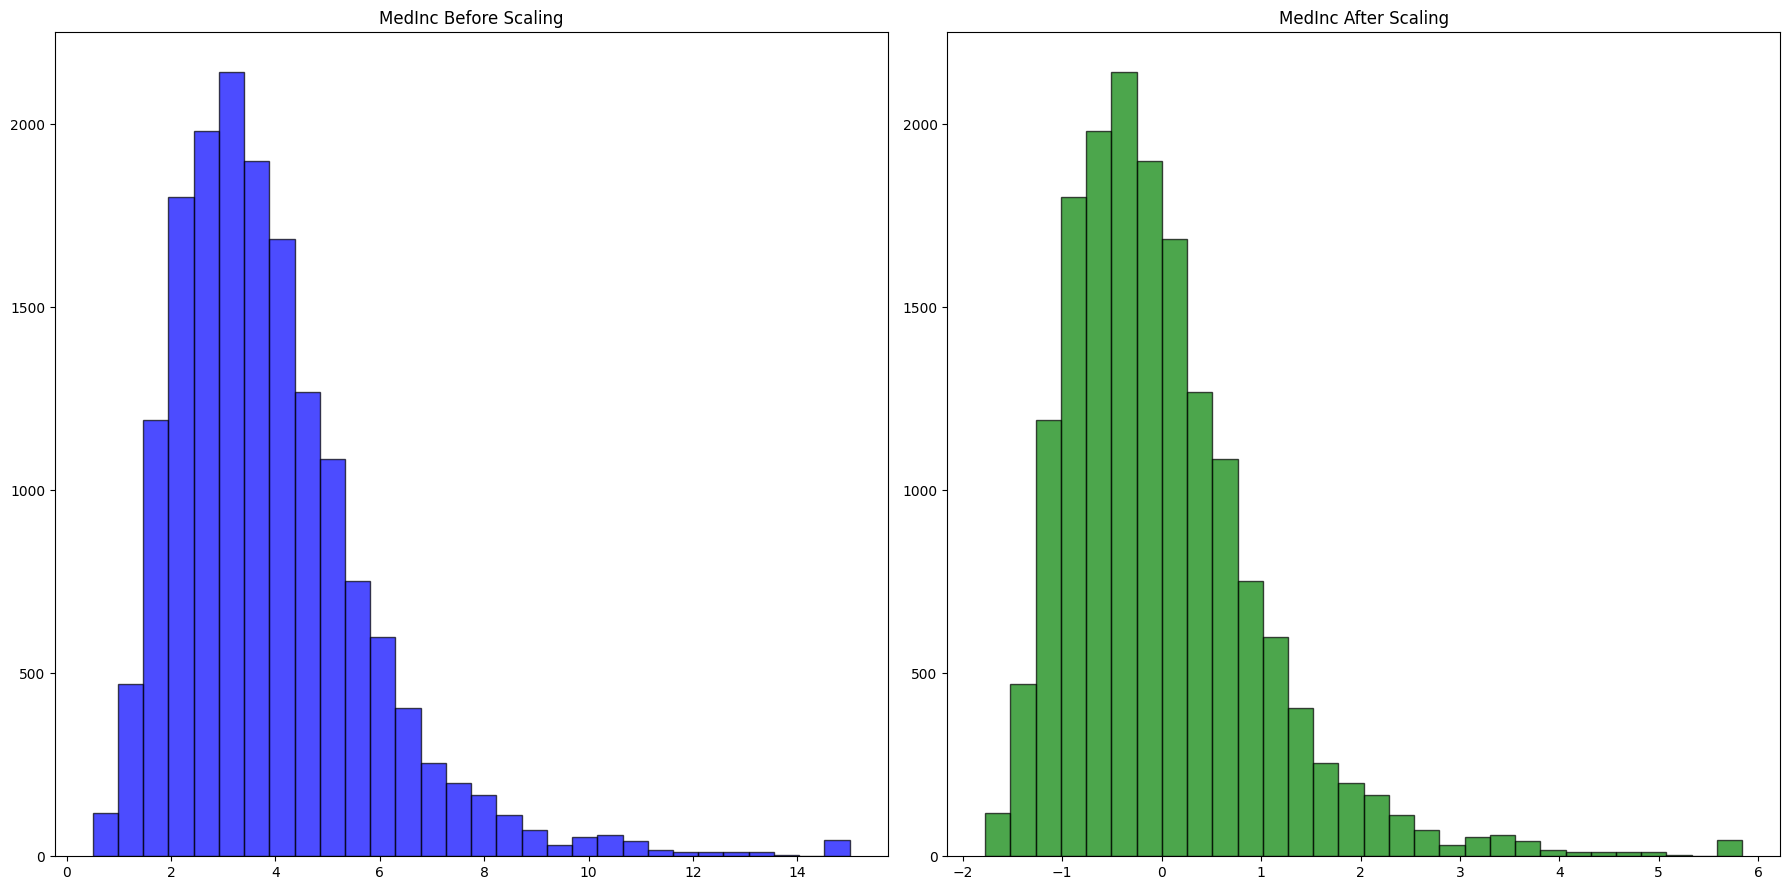

In [23]:
# [Subtask 2] Preprocessing – Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize shape of splits
print("\nTraining feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("\n")

# [Subtask 2] Preprocessing – Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize distributions before and after scaling (subset of features)
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.hist(X_train['MedInc'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("MedInc Before Scaling")
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title("MedInc After Scaling")
plt.tight_layout()
plt.show()
print("\n")


In [7]:
# [Subtask 3] Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
params_df = pd.DataFrame(model.get_params().items(), columns=['Parameter', 'Value'])
params_df

,Parameter,Value
0,copy_X,True
1,fit_intercept,True
2,n_jobs,None
3,positive,False


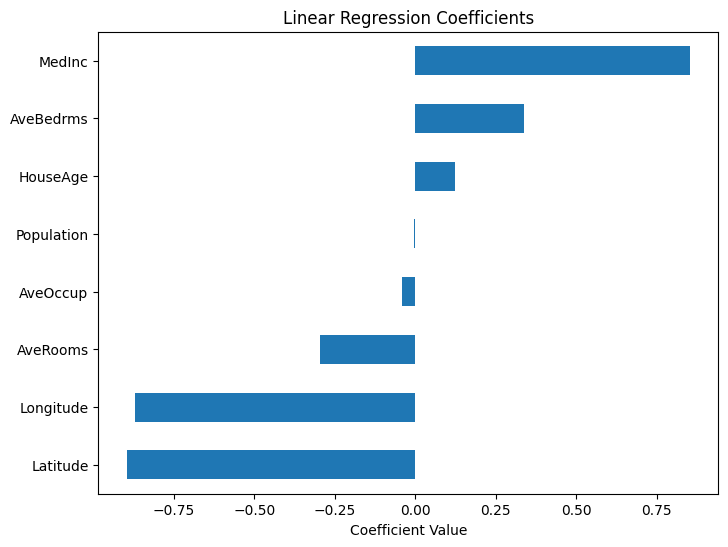

In [8]:
# Visualize learned coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

In [21]:
# [Subtask 4] Evaluate using R² Score and Mean Squared Error
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.5757877060324508
Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764


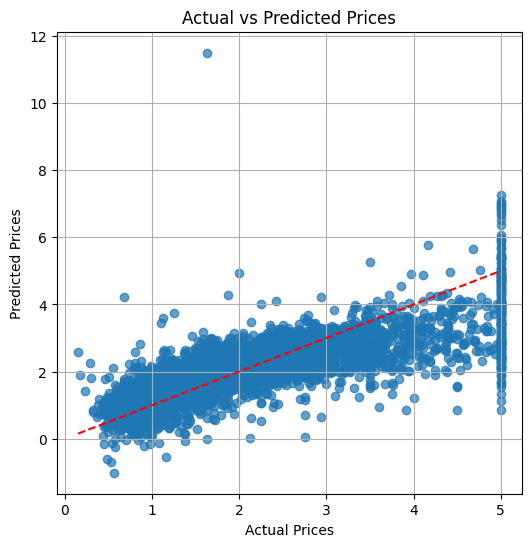

In [10]:
# [Subtask 4] Plot showing model fit
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

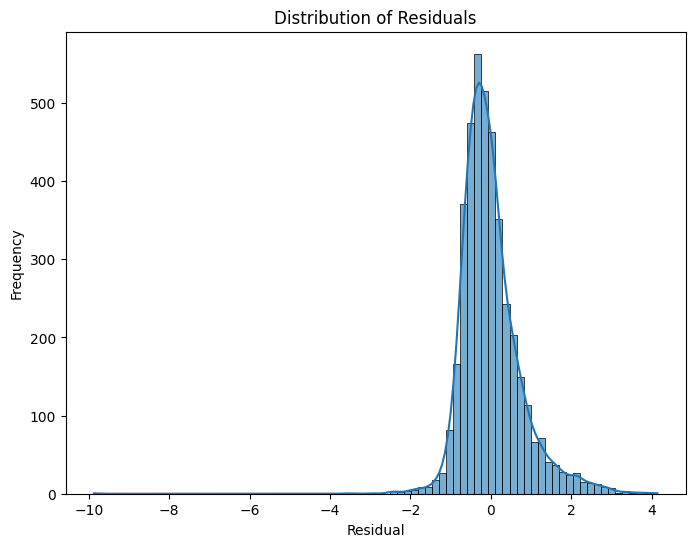

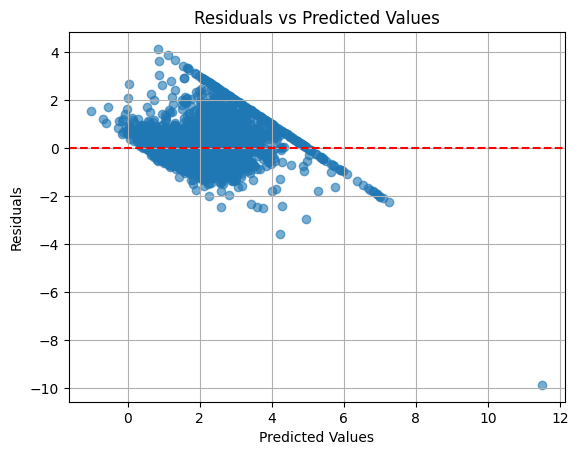

In [19]:
# [Subtask 4] Plot showing residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=80, kde=True, alpha=0.6)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
print("\n")

# Residual plot vs predicted values
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()